In [16]:
import numpy as np
import cv2
from PIL import Image
from tkinter import *
import matplotlib.pyplot as plt

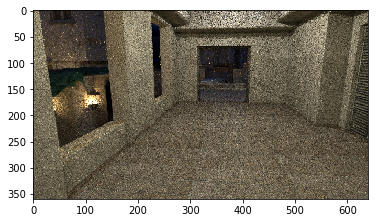

In [30]:
img = Image.open(r'C:\Users\anshu\Desktop\noisy.png')
#img = cv2.imread(r'C:\Users\anshu\Desktop\balloons.png',0)
plt.imshow(img)

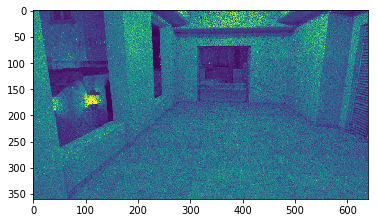

In [31]:
gray_img = img.convert('LA')
img = np.array(list(gray_img.getdata(band=0)), float)
img.shape = (gray_img.size[1], gray_img.size[0])
plt.imshow(img)


In [40]:

def denoise(img, weight=0.2, eps=1e-3, num_iter_max=200):
    """Perform total-variation denoising on a grayscale image.
    
    Parameters
    ----------
    img : array
        2-D input data to be de-noised.
    weight : float, optional
        Denoising weight. The greater `weight`, the more de-noising (at
        the expense of fidelity to `img`).
    eps : float, optional
        Relative difference of the value of the cost function that determines
        the stop criterion. The algorithm stops when:
            (E_(n-1) - E_n) < eps * E_0
    num_iter_max : int, optional
        Maximal number of iterations used for the optimization.

    Returns
    -------
    out : array
        De-noised array of floats.
    
    Notes
    -----
    Rudin, Osher and Fatemi algorithm.
    """
    u = np.zeros_like(img)
    px = np.zeros_like(img)
    py = np.zeros_like(img)
    
    nm = np.prod(img.shape[:2])
    tau = 0.125
    
    i = 0
    while i < num_iter_max:
        u_old = u
        
        # x and y components of u's gradient
        ux = np.roll(u, -1, axis=1) - u
        uy = np.roll(u, -1, axis=0) - u
        
        # update the dual variable
        px_new = px + (tau / weight) * ux
        py_new = py + (tau / weight) * uy
        norm_new = np.maximum(1, np.sqrt(px_new **2 + py_new ** 2))
        px = px_new / norm_new
        py = py_new / norm_new

        # calculate divergence
        rx = np.roll(px, 1, axis=1)
        ry = np.roll(py, 1, axis=0)
        div_p = (px - rx) + (py - ry)
        
        # update image
        u = img + weight * div_p
        
        # calculate error
        error = np.linalg.norm(u - u_old) / np.sqrt(nm)
        
        if i == 0:
            err_init = error
            err_prev = error
        else:
            # break if error small enough
            if np.abs(err_prev - error) < eps * err_init:
                break
            else:
                e_prev = error
                
        # don't forget to update iterator
        i += 1

    return u

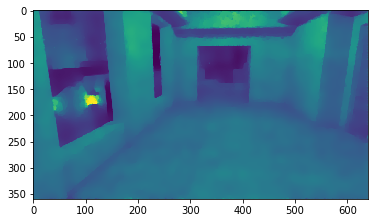

In [41]:
k=plt.imshow(denoise(img, weight=50), cmap='viridis')

In [ ]:
 imshow(deconvwnr(Blurred, PSF, estimated_nsr)), title('Wiener');
 imshow(deconvreg(Blurred, PSF)); title('Regul')
 imshow(deconvblind(Blurred, PSF, 100))
 imshow(deconvlucy(Blurred, PSF, 100))